# Solutions for Assignment 6: Urban Street Networks and Interactive Web Maps

**NOTE: THIS ASSIGNMENT IS OPTIONAL**. You must complete one out of homeworks #4, #5, and #6.

**Due date: Wednesday, 11/23 by the end of the day**

The notebook should be submitted to your own private repository on GitHub, which can be created using the following link:

https://classroom.github.com/a/x9a--7nH

#### Part 1: Visualizing crash data in Philadelphia

In this section, you will use `osmnx` to analyze the crash incidence in Center City. 

#### Part 2: Interactive web maps in Folium

In this section, you'll visualize a geospatial data set, queried using an API, using Folium in Python.

## Part 1: Visualizing crash data in Philadelphia

### 1.1 Load the geometry for the region being analyzed

We'll analyze crashes in the "Central" planning district in Philadelphia, a rough approximation for Center City. [Planning districts](https://www.opendataphilly.org/dataset/planning-districts) can be loaded from Open Data Philly. Read the data into a GeoDataFrame using the following link:

http://data.phl.opendata.arcgis.com/datasets/0960ea0f38f44146bb562f2b212075aa_0.geojson

Select the "Central" district and extract the geometry polygon for only this district. After this part, you should have a polygon variable of type `shapely.geometry.polygon.Polygon`.

In [1]:
import osmnx as ox
import pandas as pd
import geopandas as gpd
import numpy as np

In [2]:
districts = gpd.read_file("http://data.phl.opendata.arcgis.com/datasets/0960ea0f38f44146bb562f2b212075aa_0.geojson")

In [3]:
#  the selection True/False array
selection = districts['DIST_NAME'] == "Central"

# Get only Central data
boundary = districts.loc[selection]

# Extract out just the geometry
boundary = boundary.geometry.squeeze()

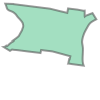

In [4]:
boundary

### 1.2 Get the street network graph

Use OSMnx to create a network graph (of type 'drive') from your polygon boundary in 1.1.

In [5]:
# get the graph
G = ox.graph_from_polygon(boundary, network_type='drive')

### 1.3 Convert your network graph edges to a GeoDataFrame

Use OSMnx to create a GeoDataFrame of the network edges in the graph object from part 1.2. The GeoDataFrame should contain the edges but not the nodes from the network.

In [6]:
# only get the edges
edges = ox.graph_to_gdfs(G, edges=True, nodes=False)

In [7]:
edges.head()

osmid  oneway                   name  \
u         v         key                                             
109727439 109911666 0    132508434    True      Bainbridge Street   
109727448 109727439 0     12109011    True  South Colorado Street   
          110034229 0     12159387    True       Fitzwater Street   
109727507 110024052 0    193364514    True       Carpenter Street   
109728761 110274344 0    672312336    True           Brown Street   

                             highway reversed   length  \
u         v         key                                  
109727439 109911666 0    residential    False   44.137   
109727448 109727439 0    residential    False  109.484   
          110034229 0    residential    False   91.353   
109727507 110024052 0    residential    False   53.208   
109728761 110274344 0    residential    False   58.270   

                                                                  geometry  \
u         v         key                                                      
109727439 109911666 0    LINESTRING (-75.17104 39.94345, -75.17053 39.9...   
109727448 109727439 0    LINESTRING (-75.17125 39.94248, -75.17120 39.9...   
          110034229 0    LINESTRING (-75.17125 39.94248, -75.17137 39.9...   
109727507 110024052 0    LINESTRING (-75.17196 39.93973, -75.17134 39.9...   
109728761 110274344 0    LINESTRING (-75.17317 39.96951, -75.17250 39.9...   

                        lanes maxspeed tunnel bridge  ref service access  \
u         v         key                                                    
109727439 109911666 0     NaN      NaN    NaN    NaN  NaN     NaN    NaN   
109727448 109727439 0     NaN      NaN    NaN    NaN  NaN     NaN    NaN   
          110034229 0     NaN      NaN    NaN    NaN  NaN     NaN    NaN   
109727507 110024052 0     NaN      NaN    NaN    NaN  NaN     NaN    NaN   
109728761 110274344 0     NaN      NaN    NaN    NaN  NaN     NaN    NaN   

                        junction  
u         v         key           
109727439 109911666 0        NaN  
109727448 109727439 0        NaN  
          110034229 0        NaN  
109727507 110024052 0        NaN  
109728761 110274344 0        NaN

### 1.4 Load PennDOT crash data

Data for 2021 crashes (of all types) is available at the following path:

`./data/CRASH_PHILADELPHIA_2021.csv`

The data was downloaded for Philadelphia County [from here](https://crashinfo.penndot.gov/PCIT/welcome.html).

In [8]:
crashes = pd.read_csv("./data/CRASH_PHILADELPHIA_2021.csv")

In [9]:
crashes.head()

,ARRIVAL_TM,AUTOMOBILE_COUNT,BELTED_DEATH_COUNT,BELTED_SUSP_SERIOUS_INJ_COUNT,BICYCLE_COUNT,BICYCLE_DEATH_COUNT,BICYCLE_SUSP_SERIOUS_INJ_COUNT,BUS_COUNT,CHLDPAS_DEATH_COUNT,CHLDPAS_SUSP_SERIOUS_INJ_COUNT,...,WZ_LN_CLOSURE,WZ_MOVING,WZ_OTHER,WZ_SHLDER_MDN,ROADWAY_CLEARED,WEATHER1,WEATHER2,WZ_WORKERS_INJ_KILLED,SECONDARY_CRASH,INTERSECTION_RELATED
0,1646.0,1,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,1710.0,3,3.0,NaN,N,N
1,1650.0,0,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,5.0,3,3.0,NaN,N,N
2,1703.0,3,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,3,NaN,NaN,N,NaN
3,1238.0,3,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,3,NaN,NaN,N,N
4,1152.0,0,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,3,NaN,NaN,N,N


### 1.5 Convert the crash data to a GeoDataFrame

You will need to use the `DEC_LAT` and `DEC_LONG` columns for latitude and longitude.

The full data dictionary for the data is [available here](http://pennshare.maps.arcgis.com/sharing/rest/content/items/ffe20c6c3c594389b275c6772a281bcd/data)

In [10]:
crashes = gpd.GeoDataFrame(
    crashes,
    geometry=gpd.points_from_xy(crashes.DEC_LONG, crashes.DEC_LAT),
    crs="epsg:4326",
)

### 1.6 Trim the crash data to Center City

1. Get the boundary of the edges data frame (from part 1.3). Accessing the `.geometry.unary_union.convex_hull` property will give you a nice outer boundary region.
1. Trim the crashes using the `within()` function of the crash GeoDataFrame to find which crashes are within the boundary.

There should be about 1,300 crashes within the Central district.

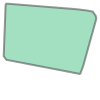

In [11]:
edges_boundary = edges.geometry.unary_union.convex_hull
edges_boundary

In [12]:
selection = crashes.within(edges_boundary)
crashes_subset = crashes.loc[selection]

In [13]:
num_crashes = len(crashes_subset)
print(f"found {num_crashes} crashes within Central district...")

found 1292 crashes within Central district...


In [14]:
edges.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

### 1.7 Re-project our data into an approriate CRS

We'll need to find the nearest edge (street) in our graph for each crash. To do this, `osmnx` will calculate the distance from each crash to the graph edges. For this calculation to be accurate, we need to convert from latitude/longitude 

**We'll convert the local state plane CRS for Philadelphia, EPSG=2272**

#### Two steps:
1. Project the graph object (`G`) using the `ox.project_graph`. Run `ox.project_graph?` to see the documentation for how to convert to a specific CRS. 
1. Project the crash data using the `.to_crs()` function.

In [15]:
G = ox.project_graph(G, to_crs=2272)
crashes_subset = crashes_subset.to_crs(epsg=2272)

### 1.8 Find the nearest edge for each crash

See: `ox.distance.nearest_edges()`. It takes three arguments:

- the network graph
- the longitude of your crash data (the `x` attribute of the `geometry` column)
- the latitude of your crash data (the `y` attribute of the `geometry` column)

You will get a numpy array with 3 columns that represent `(u, v, key)` where each `u` and `v` are the node IDs that the edge links together. We will ignore the `key` value for our analysis.

In [16]:
nearest = ox.distance.nearest_edges(G, crashes_subset.geometry.x, crashes_subset.geometry.y)

In [17]:
nearest

[(8482829382, 7065714513, 0),
 (7384791791, 775424603, 0),
 (2043885897, 5879856051, 0),
 (109739559, 110225812, 0),
 (110402209, 110416548, 0),
 (110338912, 110137117, 0),
 (109738876, 109739312, 0),
 (110296863, 110236754, 0),
 (109738876, 109739312, 0),
 (109791270, 109783164, 0),
 (110232451, 109755755, 0),
 (110139973, 110139988, 0),
 (775890861, 109783164, 0),
 (110391258, 110391256, 0),
 (109734957, 109893262, 0),
 (110522533, 110564956, 0),
 (5372039288, 110228728, 0),
 (110417346, 110417354, 0),
 (7065714513, 1589900925, 0),
 (109729709, 109729731, 0),
 (109755755, 109744095, 0),
 (109795392, 110452167, 0),
 (110441834, 110437911, 0),
 (109739559, 110225812, 0),
 (110045799, 109839902, 0),
 (109792682, 109792709, 0),
 (110047937, 110054330, 0),
 (8553549495, 109811783, 0),
 (109755755, 109744095, 0),
 (109770169, 109794952, 0),
 (110140195, 110123711, 0),
 (5562239293, 1888418037, 0),
 (1589900925, 109791270, 0),
 (765749696, 109849438, 0),
 (110047561, 110256230, 0),
 (110414

### 1.9 Calculate the total number of crashes per street

1. Make a DataFrame from your data from part 1.7 with three columns, `u`, `v`, and `key` (we will only use the `u` and `v` columns)
1. Group by `u` and `v` and calculate the size
1. Reset the index and name your `size()` column as `crash_count`

After this step you should have a DataFrame with three columns: `u`, `v`, and `crash_count`.

In [18]:
df = pd.DataFrame(nearest, columns=['u', 'v', 'key'])
counts = df.groupby(['u', 'v']).size().reset_index(name='crash_count')

In [19]:
counts.head()

,u,v,crash_count
0,109729474,3425014859,2
1,109729486,109729699,1
2,109729486,110342146,2
3,109729699,109811674,2
4,109729709,109729731,3


### 1.10 Merge your edges GeoDataFrame and crash count DataFrame

You can use pandas to merge them on the `u` and `v` columns. This will associate the total crash count with each edge in the street network. 

**Tips:** 
   - Use a `left` merge where the first argument of the merge is the edges GeoDataFrame. This ensures no edges are removed during the merge.
   - Use the `fillna(0)` function to fill in missing crash count values with zero.

In [20]:
# Perform the merge
edges_with_crashes = edges.merge(counts, on=['u', 'v'], how='left')

# Edges that are NaN didn't have any crashes!
edges_with_crashes['crash_count'] = edges_with_crashes['crash_count'].fillna(0)

### 1.11 Calculate a "Crash Index"

Let's calculate a "crash index" that provides a normalized measure of the crash frequency per street. To do this, we'll need to:

1. Calculate the total crash count divided by the street length, using the `length` column
1. Perform a log transformation of the crash/length variable — use numpy's `log10()` function
1. Normalize the index from 0 to 1 (see the lecture notes for an example of this transformation)

**Note: since the crash index involves a log transformation, you should only calculate the index for streets where the crash count is greater than zero**.

After this step, you should have a new column in the data frame from 1.9 that includes a column called part 1.9.

In [21]:
# Define the crash per length column
edges_with_crashes['crash_per_length'] = edges_with_crashes['crash_count'] / edges_with_crashes['length']

# Take the log of the nonzero elements
nonzero = edges_with_crashes['crash_count'] > 0

# The log of the crash index
log_count = np.log10(edges_with_crashes.loc[nonzero]['crash_per_length'])

In [22]:
# Crash index is normalized from 0 to 1
edges_with_crashes['crash_index'] = (log_count - log_count.min()) / (log_count.max() - log_count.min())

### 1.12 Plot a histogram of the crash index values

Use matplotlib's `hist()` function to plot the crash index values from the previous step.

You should see that the index values are Gaussian-distributed, providing justification for why we log-transformed!

In [23]:
from matplotlib import pyplot as plt

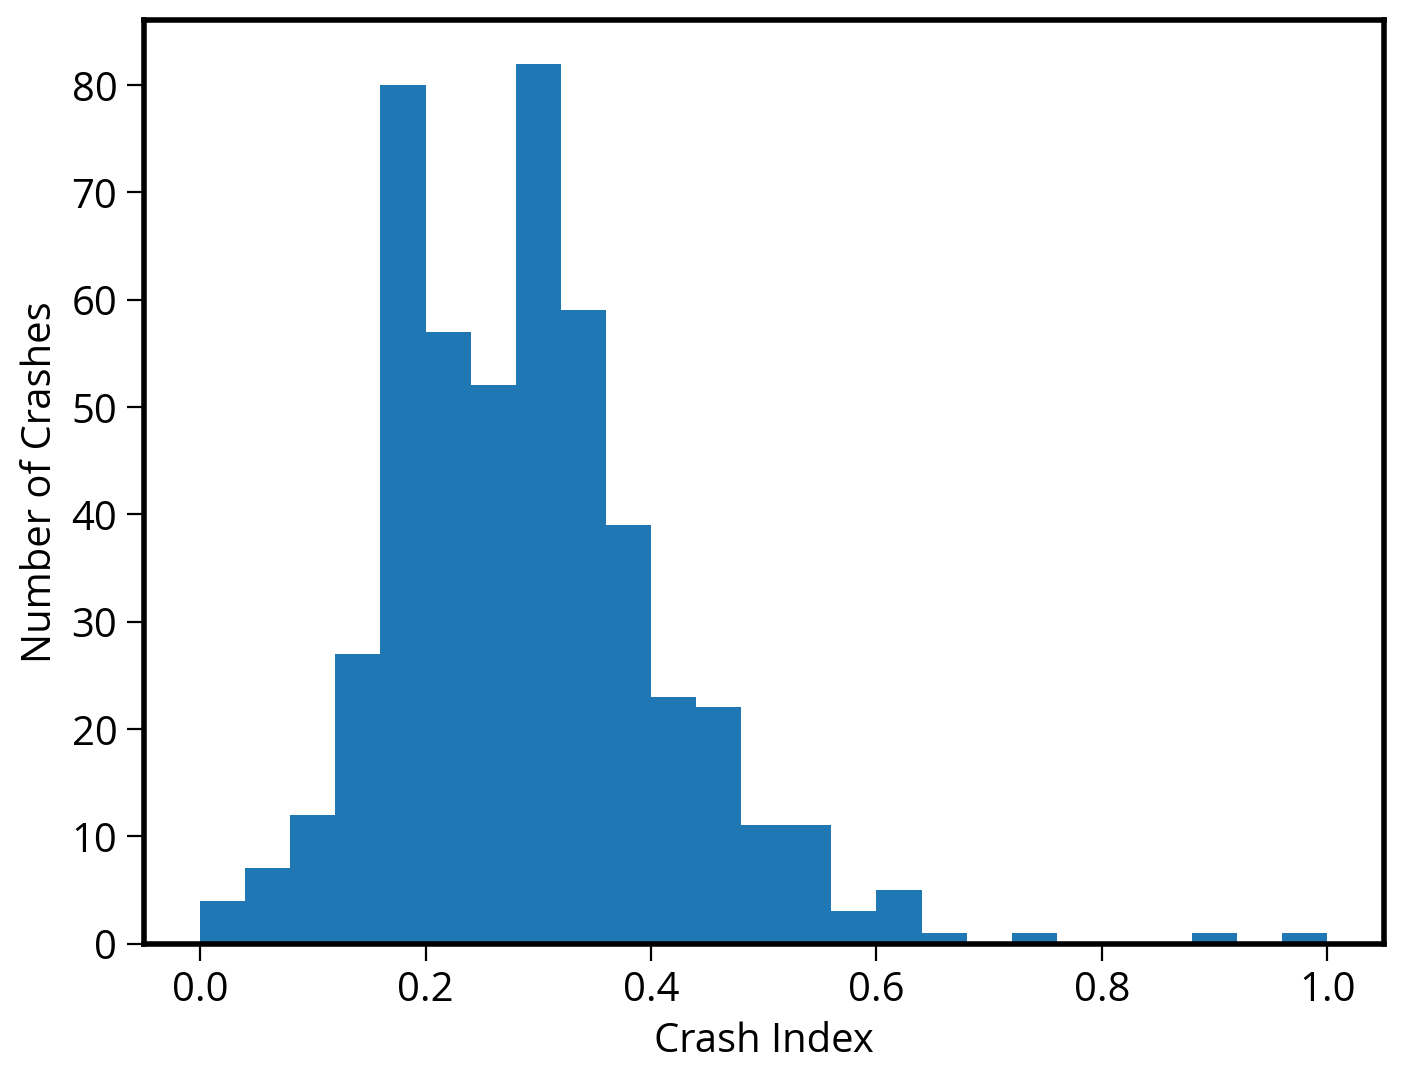

In [24]:
# Initialize the figure
fig, ax = plt.subplots(figsize=(8,6))

# Create a histogram
ax.hist(edges_with_crashes['crash_index'].dropna(), bins='auto')

# Format
ax.set_xlabel("Crash Index")
ax.set_ylabel("Number of Crashes");

### 1.13 Plot the street networks, colored by the crash index

You can use GeoPandas to make the plot, coloring the streets by the crash index column.

**Tip:** if you use the viridis color map, try setting the facecolor of the axes as black for better constrast of the colors.

In [25]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

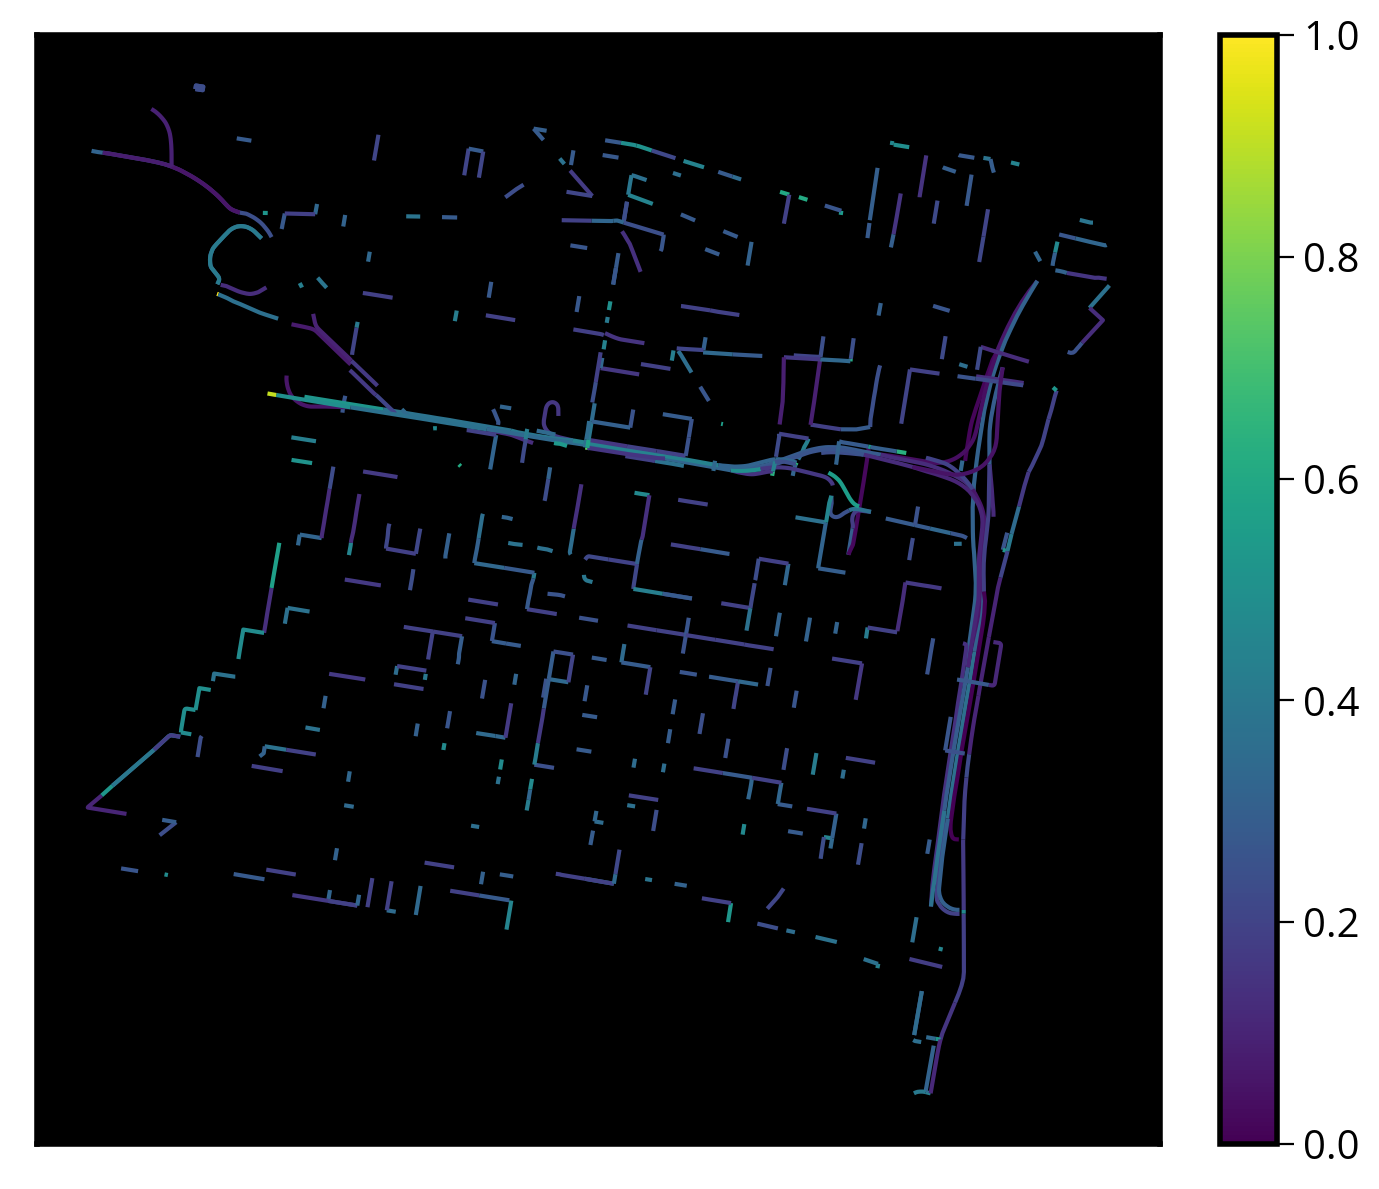

In [26]:
# Initialize 
fig, ax = plt.subplots(figsize=(8,8))

# Create a nice, lined up colorbar axes (called "cax" here)
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.3)

# Plot the 
df = edges_with_crashes.to_crs(epsg=3857)
ax = df.plot(ax=ax, cax=cax, column='crash_index', cmap='viridis', legend=True)

# Format
ax.set_facecolor('black')
ax.set_xticks([])
ax.set_yticks([])
ax.set_aspect("equal")

### 1.14 An interactive map of the crash index

In this part, we'll use Folium to make an interactive version of the map from the previous section. In this part, you will need to:

1. Initialize a Folium map centered on Philadelphia. The "Cartodb dark_matter" will be best if you want to use the viridis color map.
1. Add the street edges polygons to the map using the `Folium.GeoJson()` function.
1. Use a style function that applies a color to the edge geometries based on the value of the "crash index" column. 
    - See the crash index is defined from 0 to 1, you can pass this directly to a color map object, as in lecture.
    - You will need to convert the RGB color returned by the color map to a hex string
    - You can also set the "weight" attribute to change the width of the streets.
1. Add a GeoJsonTooltip object that includes the street name and crash index value so you can quickly identify which streets have the highest index values.

**Note:** if the Folium map is not rendering in the notebook, try removing unused columns — you should really only need the "geometry", "crash_index", and "name" columns.

In [27]:
import folium

In [28]:
import matplotlib.colors as mcolors

In [29]:
# Use a viridis cmap
cmap = plt.get_cmap("viridis")


def get_style(features):
    """
    Style the color of the geometry based on the value
    of the "crash_index" column
    """
    # Get the value of the crash index
    val = features["properties"]["crash_index"]

    # If it's None, set it to zero (no crashes)
    if val is None:
        val = 0

    # Get the color as a hex string
    rgb_color = cmap(val)
    color = mcolors.rgb2hex(rgb_color)

    # Return the style dictionary
    return {"color": color, "weight": 3}

In [30]:
# create the map
m = folium.Map(
    location=[39.95, -75.15],
    tiles='Cartodb dark_matter',
    zoom_start=13
)

# We need the geometry, name, and crash index -> convert to JSON
edges_json = edges_with_crashes[['geometry', 'name', 'crash_index']].to_json()

# add the GeoJson to the map
folium.GeoJson(
    edges_json,
    style_function=get_style,
    tooltip=folium.GeoJsonTooltip(['name', 'crash_index'])
).add_to(m)


m

## Part 2: Interactive web maps with Folium

In this part, you'll visualize a geospatial data set, queried using an API, using Folium in Python. The choice of data set is up to you, but must satisfy a few requirements:

- The data must be pulled using an API
- The data should be in GeoJSON format and be Point features (latitude, longitude)
- Use Folium to create a map showing a heat map of the data, using the Leaflet.heat plugin

#### Notes

- See [lecture 10A](https://github.com/MUSA-550-Fall-2022/week-10/blob/master/lecture-10A.ipynb) for example maps using the data set of Philadelphia building permits. **Note: you must choose a data set other than the building permits data set**.
- There are several options for data on OpenDataPhilly — any data set hosted on the CARTO SQL database with associated API documentation will work, similar to the shootings data set (you can use the `carto2gpd` library to do the querying).
- You can also choose a different API to use, as long as it satisfies the above requirements. To query the API, you can either use the `requests` module in Python or use `geopandas` directly to read the geojson returned by the API. For example:
  - the [Philadelphia bike share Indego](https://www.rideindego.com/about/data/) has an API of live station data in GeoJSON format: https://www.rideindego.com/stations/json/
  - Data.gov maintains a list of APIs in GeoJSON format: https://catalog.data.gov/dataset?res_format=GeoJSON. Note that not all of these are Point features


## Example: Mapping out pothole 311 requests from the last 30 days

This is just one example...many right solutions here.

In [31]:
import carto2gpd

In [32]:
DAYS = 30 # pull for 30 days into the past

In [33]:
# The API URL
url = "https://phl.carto.com/api/v2/sql"

# The table name for the 311 dataset
# See: https://cityofphiladelphia.github.io/carto-api-explorer/#public_cases_fc
table_name = "public_cases_fc"

# Pull street defects from the last 90 days
where = f"service_name = 'Street Defect' AND requested_datetime >= current_date - {DAYS}"

# Query
features = carto2gpd.get(url, table_name, where=where)

# Remove missing geometries
features = features.loc[features.geometry.notnull()]

In [34]:
features.head()

,geometry,cartodb_id,objectid,service_request_id,subject,status,status_notes,service_name,service_code,agency_responsible,service_notice,requested_datetime,updated_datetime,expected_datetime,closed_datetime,address,zipcode,media_url,lat,lon
0,POINT (-75.24025 39.97090),1418895,14988783,15246048,Street Defect,Closed,None,Street Defect,SR-ST01,Streets Department,3 Business Days,2022-10-19T13:29:02Z,2022-10-31T10:06:36Z,2022-10-23T20:00:00Z,2022-10-31T14:06:20Z,6053 HAVERFORD AVE,None,None,39.970900,-75.240246
1,POINT (-75.23880 39.95560),1418900,14988785,15240811,Street Defect,Closed,None,Street Defect,SR-ST01,Streets Department,3 Business Days,2022-10-17T15:00:12Z,2022-10-31T10:06:38Z,2022-10-20T20:00:00Z,2022-10-31T14:06:26Z,5822 DELANCEY ST,None,None,39.955604,-75.238803
2,POINT (-75.03208 40.07240),1634711,14989844,15241636,Street Defect,Open,None,Street Defect,SR-ST01,Streets Department,3 Business Days,2022-10-18T08:03:13Z,2022-10-31T12:06:40Z,2022-10-20T20:00:00Z,None,9126 MARSHALL ST,None,None,40.072400,-75.032081
3,POINT (-75.13479 39.96616),2055165,14981502,15252664,Dangerous Sidewalk,Open,None,Street Defect,SR-ST01,Streets Department,45 Business Days,2022-10-22T22:39:12Z,2022-10-29T12:03:54Z,2023-01-02T19:00:00Z,None,61 RICHMOND ST,None,https://d17aqltn7cihbm.cloudfront.net/uploads/...,39.966162,-75.134792
4,POINT (-75.09959 39.99853),2222731,14987893,15266522,Dangerous Sidewalk,Closed,None,Street Defect,SR-ST01,Streets Department,None,2022-10-28T17:01:25Z,2022-10-31T07:19:06Z,2023-01-10T19:00:00Z,2022-10-31T11:19:04Z,2059 PICKWICK ST,None,None,39.998535,-75.099586


In [35]:
# extract the lat and longitude from the geometry column
features['lat'] = features.geometry.y
features['lng'] = features.geometry.x

# make a NumPy array (use the "values" attribute)
coordinates = features[['lat', 'lng']].values

In [36]:
from folium.plugins import HeatMap

In [37]:
m = folium.Map(
    location=[39.99, -75.13],
    tiles='Cartodb Positron',
    zoom_start=11
)


# add heat map
HeatMap(coordinates).add_to(m)

m